In [34]:
import warnings 
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pydataset import data
from acquire import get_iris_data
from sklearn.model_selection import train_test_split
from scipy import stats
import explore

In [35]:
# Explore Exercises

# Continue in your explore_exercises.ipynb notebook. Use the iris dataset. 
# As always, add, commit, and push your changes.


In [36]:
def prep_iris(iris_df):
    iris_df = iris_df.drop(columns = ['species_id'])
    iris_df = iris_df.rename(columns=({'species_name': 'species'}))
    dummy_df = pd.get_dummies(iris_df.species, drop_first=[True])
    iris_df = pd.concat([iris_df, dummy_df], axis=1)
    return iris_df

In [37]:
iris_df = get_iris_data()
iris_df = prep_iris(iris_df)
iris_df.sample(10)

,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
35,setosa,5.0,3.2,1.2,0.2,0,0
71,versicolor,6.1,2.8,4.0,1.3,1,0
149,virginica,5.9,3.0,5.1,1.8,0,1
77,versicolor,6.7,3.0,5.0,1.7,1,0
67,versicolor,5.8,2.7,4.1,1.0,1,0
94,versicolor,5.6,2.7,4.2,1.3,1,0
60,versicolor,5.0,2.0,3.5,1.0,1,0
69,versicolor,5.6,2.5,3.9,1.1,1,0
109,virginica,7.2,3.6,6.1,2.5,0,1
37,setosa,4.9,3.6,1.4,0.1,0,0


In [38]:
iris_df.drop(columns=['versicolor','virginica'], inplace=True)
iris_df.sample(10)

,species,sepal_length,sepal_width,petal_length,petal_width
40,setosa,5.0,3.5,1.3,0.3
17,setosa,5.1,3.5,1.4,0.3
49,setosa,5.0,3.3,1.4,0.2
76,versicolor,6.8,2.8,4.8,1.4
0,setosa,5.1,3.5,1.4,0.2
64,versicolor,5.6,2.9,3.6,1.3
135,virginica,7.7,3.0,6.1,2.3
46,setosa,5.1,3.8,1.6,0.2
55,versicolor,5.7,2.8,4.5,1.3
3,setosa,4.6,3.1,1.5,0.2


In [39]:
# 1. Split your data into train, validate, and test samples.

# split data into train and test (train is 80% and test is 20%)
train, test = train_test_split(iris_df, test_size=0.2, random_state=321, stratify=iris_df.species)

# split train into train and validate (train is 70% and validate is 30%)
train, validate = train_test_split(train, train_size=0.7, random_state=321, stratify=train.species)

In [40]:
# check size

iris_df.shape, train.shape, validate.shape, test.shape

((150, 5), (84, 5), (36, 5), (30, 5))

In [41]:
# 2. Create a swarmplot using a melted dataframe of all your numeric variables. 
#    The x-axis should be the variable name, the y-axis the measure. 
#    Add another dimension using color to represent species. 
#    Document takeaways from this visualization.

train_melt = train.melt(id_vars='species', var_name='variable', value_name='measure')
train_melt.head(5)

,species,variable,measure
0,setosa,sepal_length,4.7
1,versicolor,sepal_length,5.7
2,versicolor,sepal_length,6.7
3,versicolor,sepal_length,6.0
4,virginica,sepal_length,6.4


In [42]:
train.groupby(iris_df.species).describe().T

species                setosa  versicolor  virginica
sepal_length count  28.000000   28.000000  28.000000
             mean    5.000000    6.003571   6.585714
             std     0.391578    0.412295   0.674792
             min     4.300000    5.500000   4.900000
             25%     4.775000    5.675000   6.300000
             50%     5.000000    5.950000   6.500000
             75%     5.200000    6.300000   6.875000
             max     5.800000    6.800000   7.900000
sepal_width  count  28.000000   28.000000  28.000000
             mean    3.417857    2.757143   2.978571
             std     0.389733    0.334917   0.331503
             min     3.000000    2.200000   2.500000
             25%     3.100000    2.500000   2.775000
             50%     3.400000    2.750000   3.000000
             75%     3.725000    3.000000   3.050000
             max     4.400000    3.400000   3.800000
petal_length count  28.000000   28.000000  28.000000
             mean    1.467857    4.303571   5.553571
             std     0.163421    0.351170   0.556765
             min     1.100000    3.500000   4.500000
             25%     1.400000    4.000000   5.100000
             50%     1.500000    4.400000   5.550000
             75%     1.525000    4.525000   5.825000
             max     1.900000    4.900000   6.700000
petal_width  count  28.000000   28.000000  28.000000
             mean    0.217857    1.325000   2.007143
             std     0.081892    0.201154   0.222658
             min     0.100000    1.000000   1.600000
             25%     0.200000    1.200000   1.800000
             50%     0.200000    1.300000   2.000000
             75%     0.200000    1.500000   2.125000
             max     0.400000    1.800000   2.500000

<AxesSubplot:xlabel='variable', ylabel='measure'>

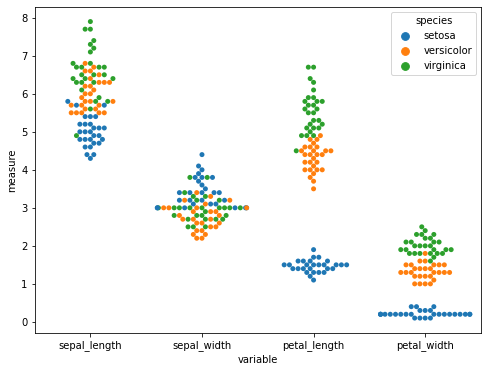

In [43]:
plt.figure(figsize=(8,6))
sns.swarmplot(data=train_melt, x='variable',y='measure',hue='species')

In [44]:
# Document takeaways from this visualization.

# viginica iris have the largest petals.
# setosa iris have the smallest petals.
# petal length and width show a clearer seperation between species

In [45]:
# 3. Create 4 subplots (2 rows x 2 columns) of scatterplots.

# sepal_length x sepal_width
# petal_length x petal_width
# sepal_area x petal_area
# sepal_length x petal_length

In [46]:
# make a new columns for petal_area

train = train.assign(petal_area = (train.petal_length * train.petal_width))

In [48]:
# make a new columns for sepal_area

train = train.assign(sepal_area = (train.sepal_length * train.sepal_width))

In [ ]:
# could have combined commands into one

#train = train.assign(sepal_area = (train.sepal_length * train.sepal_width), petal_area = (train.petal_length * train.petal_width))

In [49]:
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,petal_area,sepal_area
2,setosa,4.7,3.2,1.3,0.2,0.26,15.04
79,versicolor,5.7,2.6,3.5,1.0,3.50,14.82
65,versicolor,6.7,3.1,4.4,1.4,6.16,20.77
85,versicolor,6.0,3.4,4.5,1.6,7.20,20.40
115,virginica,6.4,3.2,5.3,2.3,12.19,20.48


In [ ]:
# Create 4 subplots (2 rows x 2 columns) of scatterplots

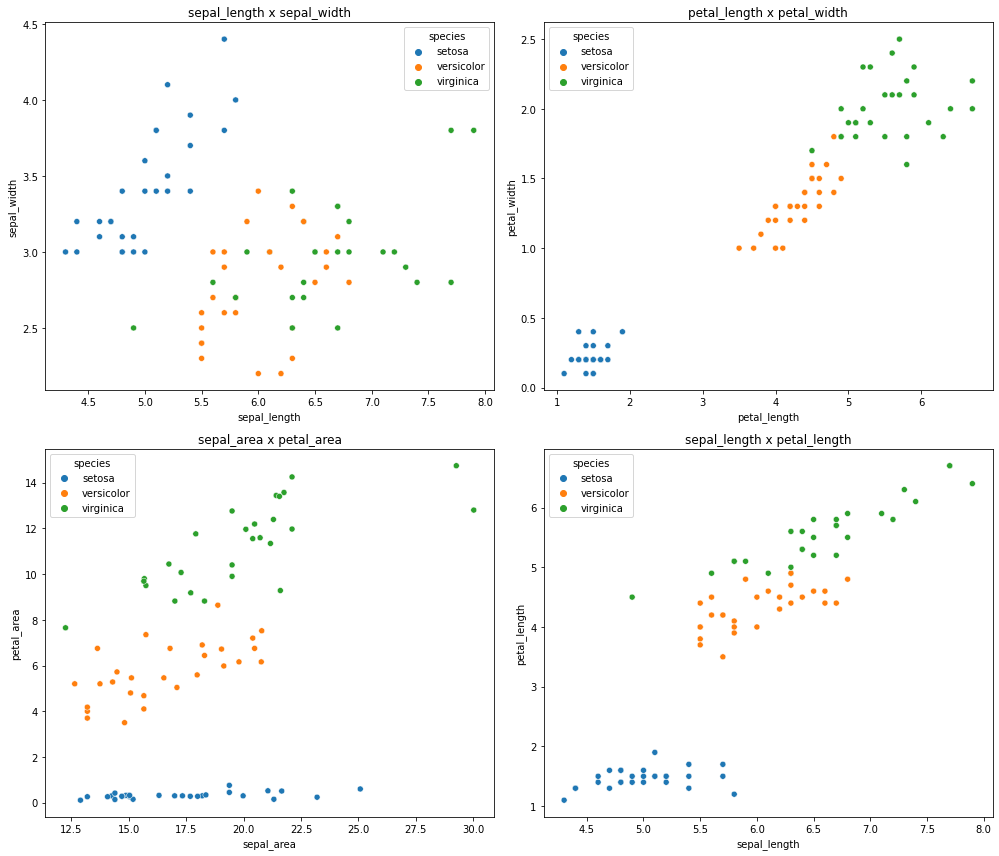

In [57]:
plt.figure(figsize=(14, 12)) 
plt.subplot(2,2,1)
sns.scatterplot(data=train, x='sepal_length', y='sepal_width', hue='species')
plt.title('sepal_length x sepal_width')

plt.subplot(2,2,2)
sns.scatterplot(data=train, x='petal_length', y='petal_width', hue='species')
plt.title('petal_length x petal_width')

plt.subplot(2,2,3)
sns.scatterplot(data=train, x='sepal_area', y='petal_area', hue='species')
plt.title('sepal_area x petal_area')

plt.subplot(2,2,4)
sns.scatterplot(data=train, x='sepal_length', y='petal_length', hue='species')
plt.title('sepal_length x petal_length')

plt.tight_layout()

In [ ]:
# 4. What are your takeaways? Write them down :)

#sepal and pedel length is useful to see species seperation
#sepal and pedel area also show species seperation

In [58]:
# 5. Create a heatmap of each variable layering correlation coefficient on top.

train.corr()

,sepal_length,sepal_width,petal_length,petal_width,petal_area,sepal_area
sepal_length,1.000000,-0.122196,0.874920,0.813567,0.849734,0.661846
sepal_width,-0.122196,1.000000,-0.417006,-0.359982,-0.280584,0.658089
petal_length,0.874920,-0.417006,1.000000,0.968112,0.962937,0.357003
petal_width,0.813567,-0.359982,0.968112,1.000000,0.981274,0.354784
petal_area,0.849734,-0.280584,0.962937,0.981274,1.000000,0.441991
sepal_area,0.661846,0.658089,0.357003,0.354784,0.441991,1.000000


<AxesSubplot:>

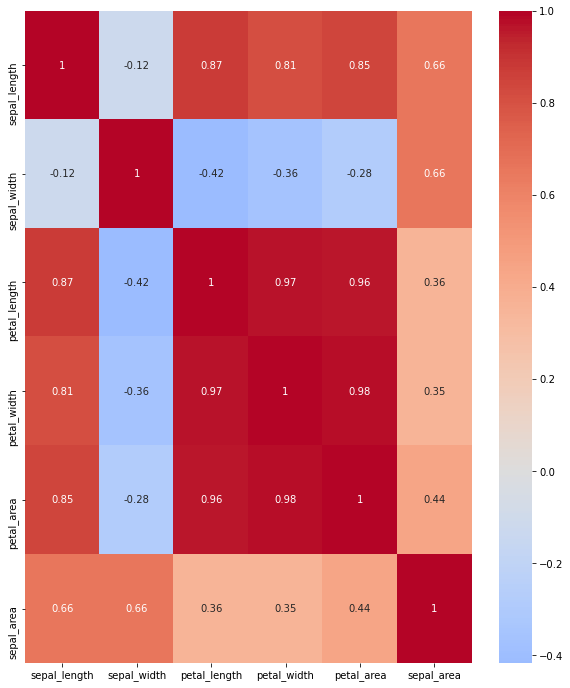

In [66]:
plt.figure(figsize=(10, 12))
sns.heatmap(train.corr(), annot=True, cmap="coolwarm", center=0)

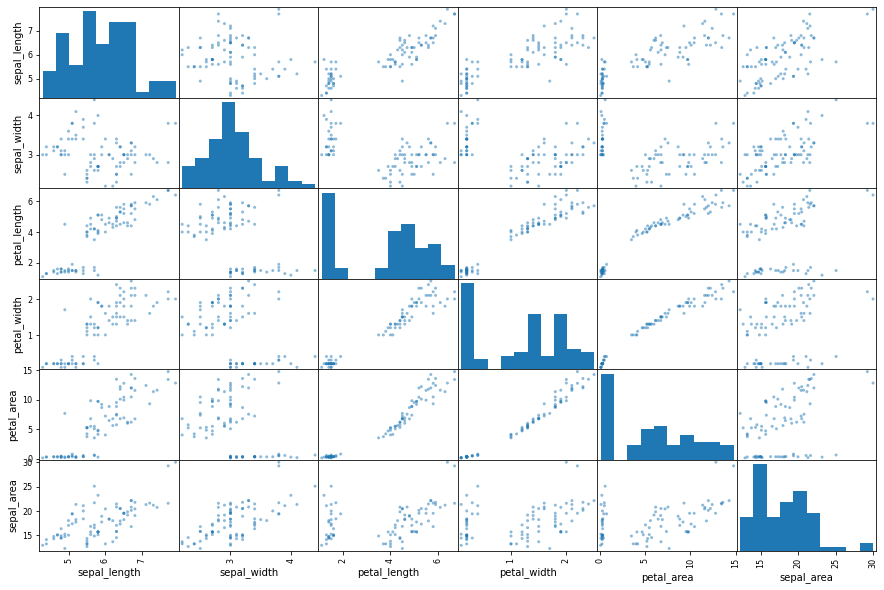

In [82]:
# 6. Create a scatter matrix visualizing the interaction of each variable.

pd.plotting.scatter_matrix(train,figsize=(15,10))
plt.show()

In [ ]:
# 7. Is the sepal length significantly different in virginica compared to versicolor? 
#    Run a statistical experiment to test this.

In [83]:
train.groupby('species').sepal_length.describe().T

species,setosa,versicolor,virginica
count,28.000000,28.000000,28.000000
mean,5.000000,6.003571,6.585714
std,0.391578,0.412295,0.674792
min,4.300000,5.500000,4.900000
25%,4.775000,5.675000,6.300000
50%,5.000000,5.950000,6.500000
75%,5.200000,6.300000,6.875000
max,5.800000,6.800000,7.900000


In [84]:
# isolate variables

virginica = train[train.species == 'virginica']
versicolor = train[train.species == 'versicolor']

In [85]:
alpha = 0.05

t, p = stats.ttest_ind(virginica.sepal_length, versicolor.sepal_length)
t, p

(3.895414869673674, 0.0002722710535887423)

In [88]:
# 8. Make sure to include a null hypothesis, alternative hypothesis, results, and summary.

# Ho: Sepal length is the same in virginica and versicolor.
# Ha: Sepal length significantly different in virginica and versicolor.

if p < alpha and t > 0:
    print("We reject the null hypothesis")
else:
    print("we fail to reject the null hypothesis")

We reject the null hypothesis


In [ ]:
# 9. What is your takeaway from this statistical testing?

# Sepal length can help determine the species type.

In [ ]:
# 10. Create any other visualizations and run any other statistical tests you think will be
#     helpful in exploring this data set.


In [93]:
# Ho: Sepal width is the same in virginica and versicolor.
# Ha: Sepal width significantly different in virginica and versicolor.

alpha = .05

stats.mannwhitneyu(virginica.sepal_width, versicolor.sepal_width)

MannwhitneyuResult(statistic=260.0, pvalue=0.014859240044088402)

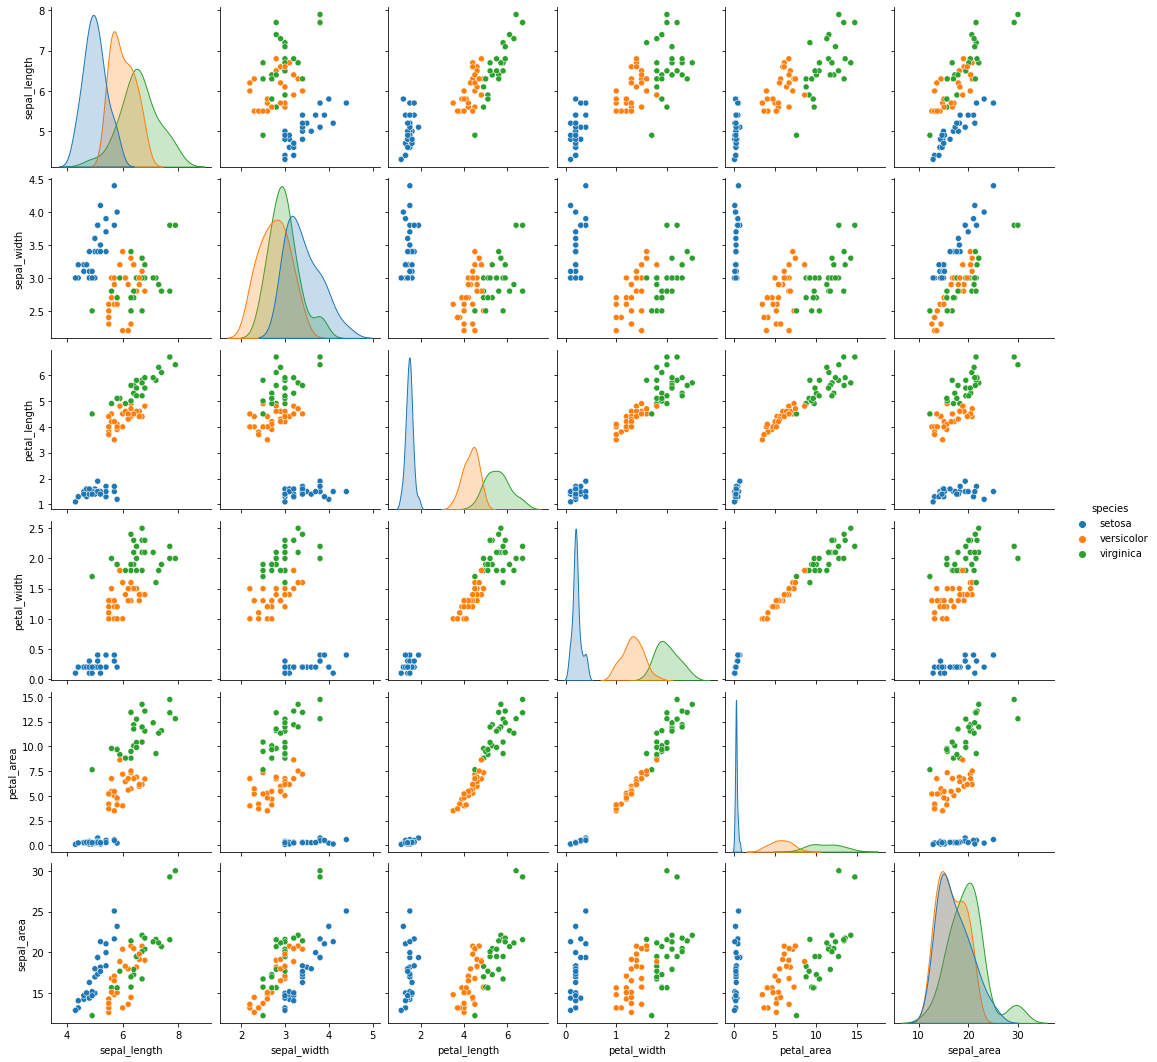

In [89]:
sns.pairplot(data=train, hue='species')

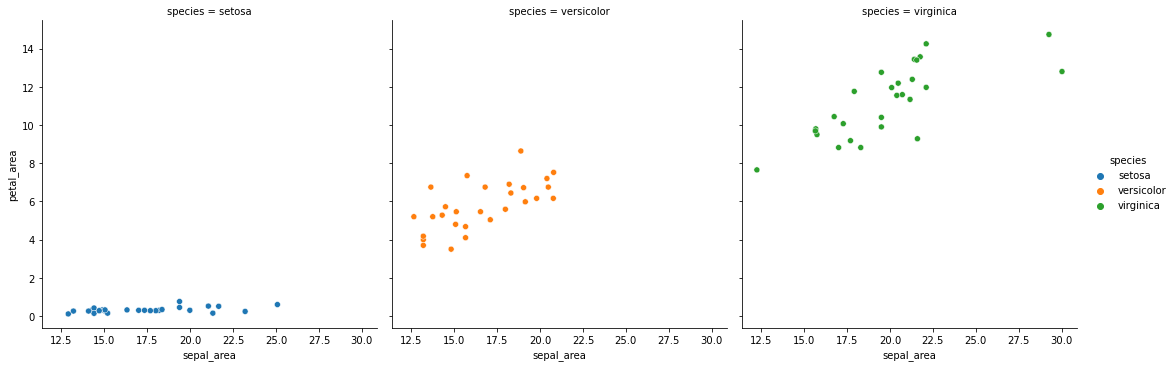

In [90]:
sns.relplot(data=train, x='sepal_area', y='petal_area', kind='scatter', hue='species', col='species')